# 데이터 인코딩

In [8]:
import pandas as pd

# Provide the correct file path and encoding
file_path = 'data/2022년 파일/(추정매출-상권)_2022_편의점.csv'
encoding_type = 'euc-kr'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, encoding=encoding_type)

# Do some operations or modifications on the DataFrame if needed

# Save the modified DataFrame to a new CSV file
output_file_path = 'data/2022년 파일/(추정매출-상권)_2022_편의점(인코딩).csv'
data.to_csv(output_file_path, index=False)

# Display a message indicating successful saving
print(f'DataFrame has been successfully saved to {output_file_path}')

DataFrame has been successfully saved to data/2022년 파일/(추정매출-상권)_2022_편의점(인코딩).csv


In [9]:
import pandas as pd

# Provide the correct file path and encoding
file_path = 'data/원본파일/(영역-상권).csv'
encoding_type = 'euc-kr'  # Change to the appropriate encoding if needed

# Read the CSV file into a DataFrame
original_data = pd.read_csv(file_path, encoding=encoding_type)

# Do some operations or modifications on the original DataFrame if needed

# Save the modified DataFrame to a new CSV file
output_original_file_path = 'data/원본파일/(영역-상권)(인코딩).csv'
original_data.to_csv(output_original_file_path, index=False)

# Display a message indicating successful saving
print(f'Original DataFrame has been successfully saved to {output_original_file_path}')

Original DataFrame has been successfully saved to data/원본파일/(영역-상권)(인코딩).csv


# 공통 컬림인 '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'를 기준으로 join

In [34]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/2022년 파일/(추정매출-상권)_2022_편의점(인코딩).csv'
file_path2 = 'data/원본파일/(영역-상권)(인코딩).csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/merged_data.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20221        D       발달상권  3120032      충무로역  CS300002         편의점   
1      20221        D       발달상권  3120021    시청역_8번  CS300002         편의점   
2      20221        D       발달상권  3120014     종로5가역  CS300002         편의점   
3      20221        D       발달상권  3120028  명동(명동거리)  CS300002         편의점   
4      20221        D       발달상권  3120056       구의역  CS300002         편의점   

     당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  연령대_40_매출_건수  연령대_50_매출_건수  \
0  2568617603    388871  2053294019  ...         73989         68838   
1   589412178    110141   589412178  ...         30336         11441   
2  1229403942    189601  1010279193  ...         45487         30258   
3  2457027151    442739  1841040086  ...         92724         53621   
4  2310296405    342339  1670603879  ...         55386         43559   

   연령대_60_이상_매출_건수  엑스좌표_값  와이좌표_값  자치구_코드  자치구_코드_명    행정동_코드  행정동_코드_명  \
0            29859  199553  

In [35]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/merged_data.csv'
file_path2 = 'data/2022년 파일/(길단위인구-상권)_2022.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/merged_data2.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20221        D       발달상권  3120032      충무로역  CS300002         편의점   
1      20221        D       발달상권  3120021    시청역_8번  CS300002         편의점   
2      20221        D       발달상권  3120014     종로5가역  CS300002         편의점   
3      20221        D       발달상권  3120028  명동(명동거리)  CS300002         편의점   
4      20221        D       발달상권  3120056       구의역  CS300002         편의점   

     당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  시간대_14_17_유동인구_수  시간대_17_21_유동인구_수  \
0  2568617603    388871  2053294019  ...            294718            289567   
1   589412178    110141   589412178  ...             97711             65500   
2  1229403942    189601  1010279193  ...            175973            156710   
3  2457027151    442739  1841040086  ...            313836            257323   
4  2310296405    342339  1670603879  ...            192357            290777   

   시간대_21_24_유동인구_수  월요일_유동인구_수  화요일_유동인구_수  수요일_유동인구_수 

In [36]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/merged_data2.csv'
file_path2 = 'data/2022년 파일/(상주인구-상권)_2022.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/merged_data3.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20221        D       발달상권  3120032      충무로역  CS300002         편의점   
1      20221        D       발달상권  3120021    시청역_8번  CS300002         편의점   
2      20221        D       발달상권  3120014     종로5가역  CS300002         편의점   
3      20221        D       발달상권  3120028  명동(명동거리)  CS300002         편의점   
4      20221        D       발달상권  3120056       구의역  CS300002         편의점   

     당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  남성연령대_60_이상_상주인구_수  여성연령대_10_상주인구_수  \
0  2568617603    388871  2053294019  ...                 415               66   
1   589412178    110141   589412178  ...                  10                0   
2  1229403942    189601  1010279193  ...                 157               14   
3  2457027151    442739  1841040086  ...                  27                5   
4  2310296405    342339  1670603879  ...                 293              115   

   여성연령대_20_상주인구_수  여성연령대_30_상주인구_수  여성연령대_40_상주인구

In [37]:
# 데이터 개수 3413 => 3396

In [38]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/merged_data3.csv'
file_path2 = 'data/2022년 파일/(직장인구-상권)_2022.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/merged_data4.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20221        D       발달상권  3120032      충무로역  CS300002         편의점   
1      20221        D       발달상권  3120021    시청역_8번  CS300002         편의점   
2      20221        D       발달상권  3120014     종로5가역  CS300002         편의점   
3      20221        D       발달상권  3120028  명동(명동거리)  CS300002         편의점   
4      20221        D       발달상권  3120056       구의역  CS300002         편의점   

     당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  남성연령대_30_직장_인구_수  남성연령대_40_직장_인구_수  \
0  2568617603    388871  2053294019  ...              1200              1480   
1   589412178    110141   589412178  ...              4433              5165   
2  1229403942    189601  1010279193  ...               860               851   
3  2457027151    442739  1841040086  ...              1955              2310   
4  2310296405    342339  1670603879  ...               129               223   

   남성연령대_50_직장_인구_수  남성연령대_60_이상_직장_인구_수  여성연령대_10_직장_인구

In [40]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/merged_data4.csv'
file_path2 = 'data/2022년 파일/(소득소비-상권)_2022.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/merged_data5.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20221        D       발달상권  3120032      충무로역  CS300002         편의점   
1      20221        D       발달상권  3120021    시청역_8번  CS300002         편의점   
2      20221        D       발달상권  3120014     종로5가역  CS300002         편의점   
3      20221        D       발달상권  3120028  명동(명동거리)  CS300002         편의점   
4      20221        D       발달상권  3120056       구의역  CS300002         편의점   

     당월_매출_금액  당월_매출_건수    주중_매출_금액  ...        지출_총금액   식료품_지출_총금액  \
0  2568617603    388871  2053294019  ...  1.527631e+09  369541350.0   
1   589412178    110141   589412178  ...  2.619551e+08   60842932.0   
2  1229403942    189601  1010279193  ...  1.192757e+08   30396779.0   
3  2457027151    442739  1841040086  ...  1.019955e+08   23884412.0   
4  2310296405    342339  1670603879  ...  1.755744e+09  476180458.0   

   의류_신발_지출_총금액  생활용품_지출_총금액   의료비_지출_총금액    교통_지출_총금액   여가_지출_총금액  \
0   201468785.0  127452485.0  186027488.

In [41]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/merged_data5.csv'
file_path2 = 'data/2022년 파일/(집객시설-상권)_2022.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/merged_data_final.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20221        D       발달상권  3120032      충무로역  CS300002         편의점   
1      20221        D       발달상권  3120021    시청역_8번  CS300002         편의점   
2      20221        D       발달상권  3120014     종로5가역  CS300002         편의점   
3      20221        D       발달상권  3120028  명동(명동거리)  CS300002         편의점   
4      20221        D       발달상권  3120056       구의역  CS300002         편의점   

     당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  대학교_수  백화점_수  슈퍼마켓_수  극장_수  숙박_시설_수  \
0  2568617603    388871  2053294019  ...    NaN    NaN     NaN   3.0      1.0   
1   589412178    110141   589412178  ...    NaN    NaN     NaN   NaN      NaN   
2  1229403942    189601  1010279193  ...    NaN    NaN     NaN   NaN      2.0   
3  2457027151    442739  1841040086  ...    1.0    NaN     NaN   3.0      2.0   
4  2310296405    342339  1670603879  ...    NaN    NaN     NaN   NaN      NaN   

   공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수  
0  

# 'data/서울시 파일/merged_data_final.csv'의 결측치 처리

In [1]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/서울시 파일/merged_data_final.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head(1))

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드 상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20221        D       발달상권  3120032    충무로역  CS300002         편의점   

     당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  대학교_수  백화점_수  슈퍼마켓_수  극장_수  숙박_시설_수  \
0  2568617603    388871  2053294019  ...    NaN    NaN     NaN   3.0      1.0   

   공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수  
0   NaN     NaN       NaN      2.0       8.0  

[1 rows x 161 columns]


In [2]:
# 결측치 확인
missing_values = df.isnull().sum()

# 결과 출력
print(missing_values)

기준_년분기_코드        0
상권_구분_코드         0
상권_구분_코드_명       0
상권_코드            0
상권_코드_명          0
              ... 
공항_수          3376
철도_역_수        3376
버스_터미널_수      3368
지하철_역_수       2705
버스_정거장_수       287
Length: 161, dtype: int64


In [3]:
# 결측치가 있는 컬럼 확인
columns_with_missing_values = df.columns[df.isnull().any()]

# 결과 출력
print("결측치가 있는 컬럼:", columns_with_missing_values)

결측치가 있는 컬럼: Index(['지출_총금액', '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액',
       '교통_지출_총금액', '여가_지출_총금액', '문화_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액',
       '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초등학교_수',
       '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수'],
      dtype='object')


In [4]:
# '지출_총금액'이 결측치인 행 삭제
df = df.dropna(subset=['지출_총금액'])

# 데이터프레임의 행의 개수 확인
data_count = df.shape[0]

# 결과 출력
print("데이터 개수:", data_count)

데이터 개수: 3332


In [5]:
# 결측치가 있는 컬럼 확인
columns_with_missing_values = df.columns[df.isnull().any()]

# 결과 출력
print("결측치가 있는 컬럼:", columns_with_missing_values)

결측치가 있는 컬럼: Index(['관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초등학교_수',
       '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수'],
      dtype='object')


In [6]:
# 결측치가 있는 컬럼을 0으로 채우기
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(0)

# 결과 출력
print(df.head())

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20221        D       발달상권  3120032      충무로역  CS300002         편의점   
1      20221        D       발달상권  3120021    시청역_8번  CS300002         편의점   
2      20221        D       발달상권  3120014     종로5가역  CS300002         편의점   
3      20221        D       발달상권  3120028  명동(명동거리)  CS300002         편의점   
4      20221        D       발달상권  3120056       구의역  CS300002         편의점   

     당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  대학교_수  백화점_수  슈퍼마켓_수  극장_수  숙박_시설_수  \
0  2568617603    388871  2053294019  ...    0.0    0.0     0.0   3.0      1.0   
1   589412178    110141   589412178  ...    0.0    0.0     0.0   0.0      0.0   
2  1229403942    189601  1010279193  ...    0.0    0.0     0.0   0.0      2.0   
3  2457027151    442739  1841040086  ...    1.0    0.0     0.0   3.0      2.0   
4  2310296405    342339  1670603879  ...    0.0    0.0     0.0   0.0      0.0   

   공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수  
0  

In [7]:
# 결측치가 있는 컬럼 확인
columns_with_missing_values_after_fillna = df.columns[df.isnull().any()]

# 결과 출력
print("대체 후 결측치가 있는 컬럼:", columns_with_missing_values_after_fillna)

대체 후 결측치가 있는 컬럼: Index([], dtype='object')


In [8]:
# CSV 파일로 저장
df.to_csv('data/서울시 파일/filled_data.csv', index=False)

# data/서울시 파일/filled_data.csv의 컬럼 처리

## 컬럼 처리
* 아파트_가구_수 컬럼의 값이 모두 0이므로 삭제

In [10]:
import pandas as pd

# CSV 파일 불러오기
file_path = 'data/서울시 파일/filled_data.csv'
df = pd.read_csv(file_path)

# 특정 컬럼 삭제
columns_to_drop = ['아파트_가구_수']
df = df.drop(columns=columns_to_drop)

# 수정된 데이터프레임 확인
print(df.head())

# 수정된 데이터프레임을 새로운 CSV 파일로 저장
df.to_csv('data/서울시 파일/modified_data.csv', index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20221        D       발달상권  3120032      충무로역  CS300002         편의점   
1      20221        D       발달상권  3120021    시청역_8번  CS300002         편의점   
2      20221        D       발달상권  3120014     종로5가역  CS300002         편의점   
3      20221        D       발달상권  3120028  명동(명동거리)  CS300002         편의점   
4      20221        D       발달상권  3120056       구의역  CS300002         편의점   

     당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  대학교_수  백화점_수  슈퍼마켓_수  극장_수  숙박_시설_수  \
0  2568617603    388871  2053294019  ...    0.0    0.0     0.0   3.0      1.0   
1   589412178    110141   589412178  ...    0.0    0.0     0.0   0.0      0.0   
2  1229403942    189601  1010279193  ...    0.0    0.0     0.0   0.0      2.0   
3  2457027151    442739  1841040086  ...    1.0    0.0     0.0   3.0      2.0   
4  2310296405    342339  1670603879  ...    0.0    0.0     0.0   0.0      0.0   

   공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수  
0  

# 최종 파일

data/서울시 파일/modified_data.csv

# EDA

## 종속변수인 당월_매출_금액 시각화

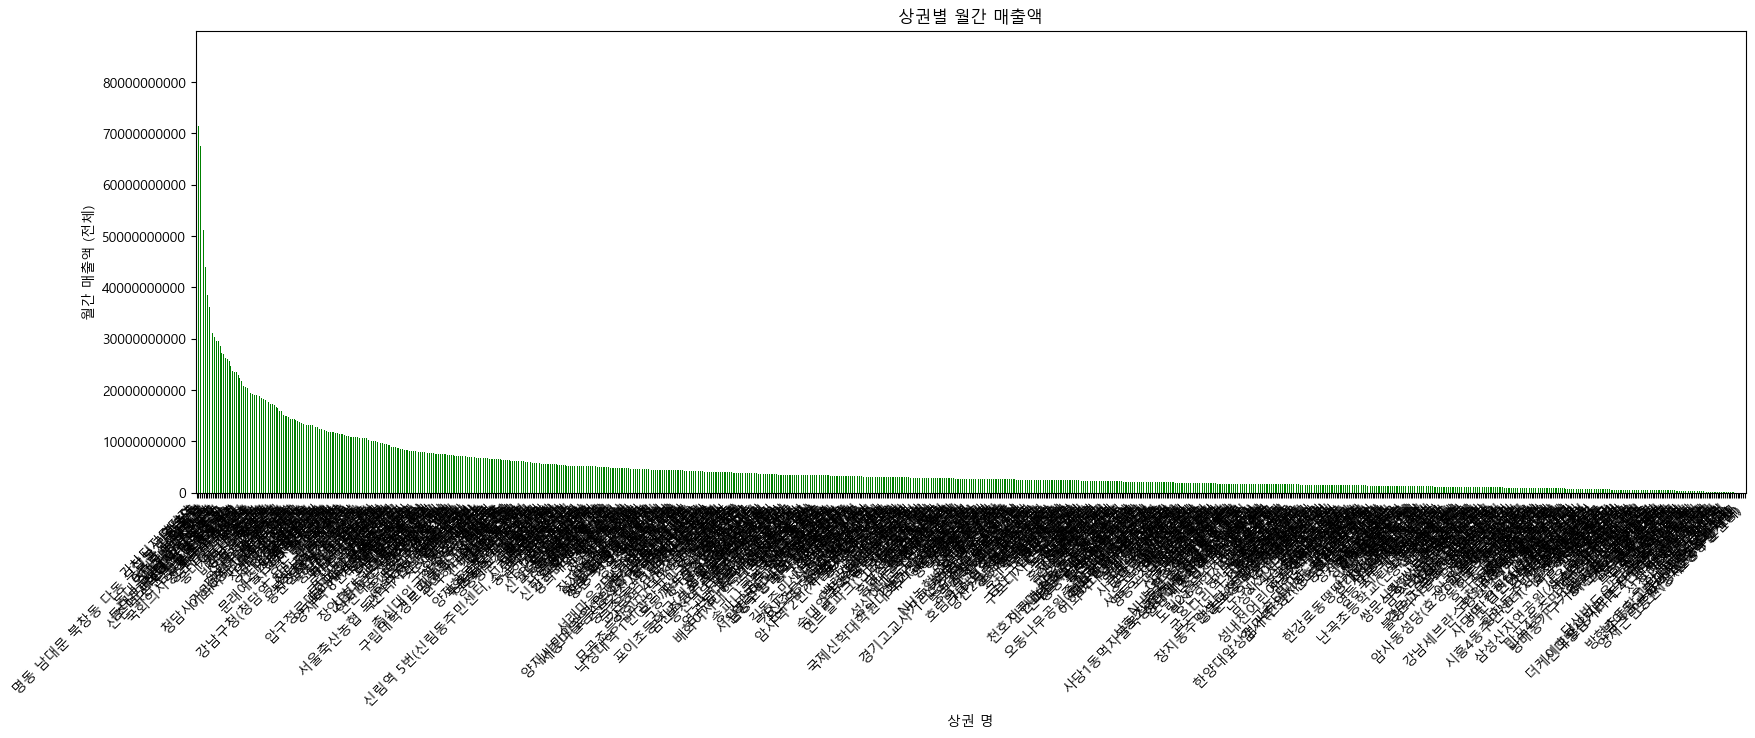

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Load the CSV file
file_path = 'data/서울시 파일/modified_data.csv'
df = pd.read_csv(file_path)

# Group the data by '상권_코드_명' and calculate the sum of monthly sales
monthly_sales_by_market_name = df.groupby('상권_코드_명')['당월_매출_금액'].sum()

# 폰트 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'  # 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Visualization
plt.figure(figsize=(20, 6))
monthly_sales_by_market_name.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('상권별 월간 매출액')
plt.xlabel('상권 명')
plt.ylabel('월간 매출액 (전체)')
plt.xticks(rotation=45, ha='right')

# y 축 단위를 전체로 설정
plt.ticklabel_format(axis='y', style='plain', useOffset=False)
plt.show()